# Penguins EDA

**Estimated Time**: ??? <br>
**Developer**: James Geronimo

## Table of Contents

...

---

## 1. Introduction

### 1.1. Learning Objectives

...

### 1.2. Understanding ANOVA

...

### 1.3. Setup

...

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from ipywidgets import interact, widgets

---

## 2. Data Preparation

...

In [2]:
# Load the dataset
penguins = pd.read_csv("penguins.csv")
penguins.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
penguins = penguins.drop(columns=['studyName', 'Sample Number', 'Region', 'Island', 
                                  'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 
                                  'Sex', 'Comments'])
penguins = penguins.dropna()
penguins

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),38.9,17.8,181.0,3625.0,9.18718,-25.21799
...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,8.24246,-26.11969


---

## 3. Visualizing the Data

...

(array([ 8., 38., 53., 45., 49., 54., 61., 15.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

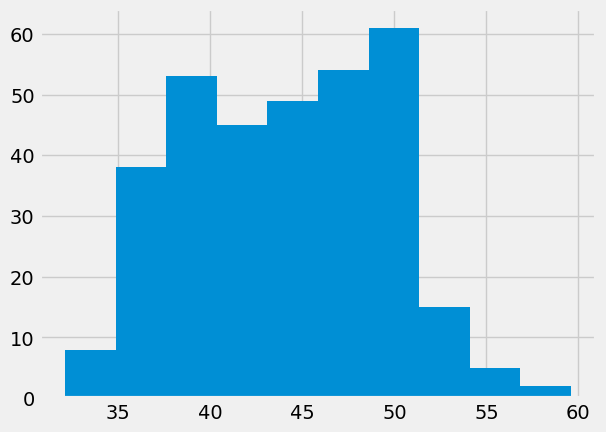

In [4]:
plt.hist(penguins["Culmen Length (mm)"])

In [5]:
quant = penguins.columns.to_list()
quant.remove('Species')
quant

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

<Figure size 1200x600 with 0 Axes>

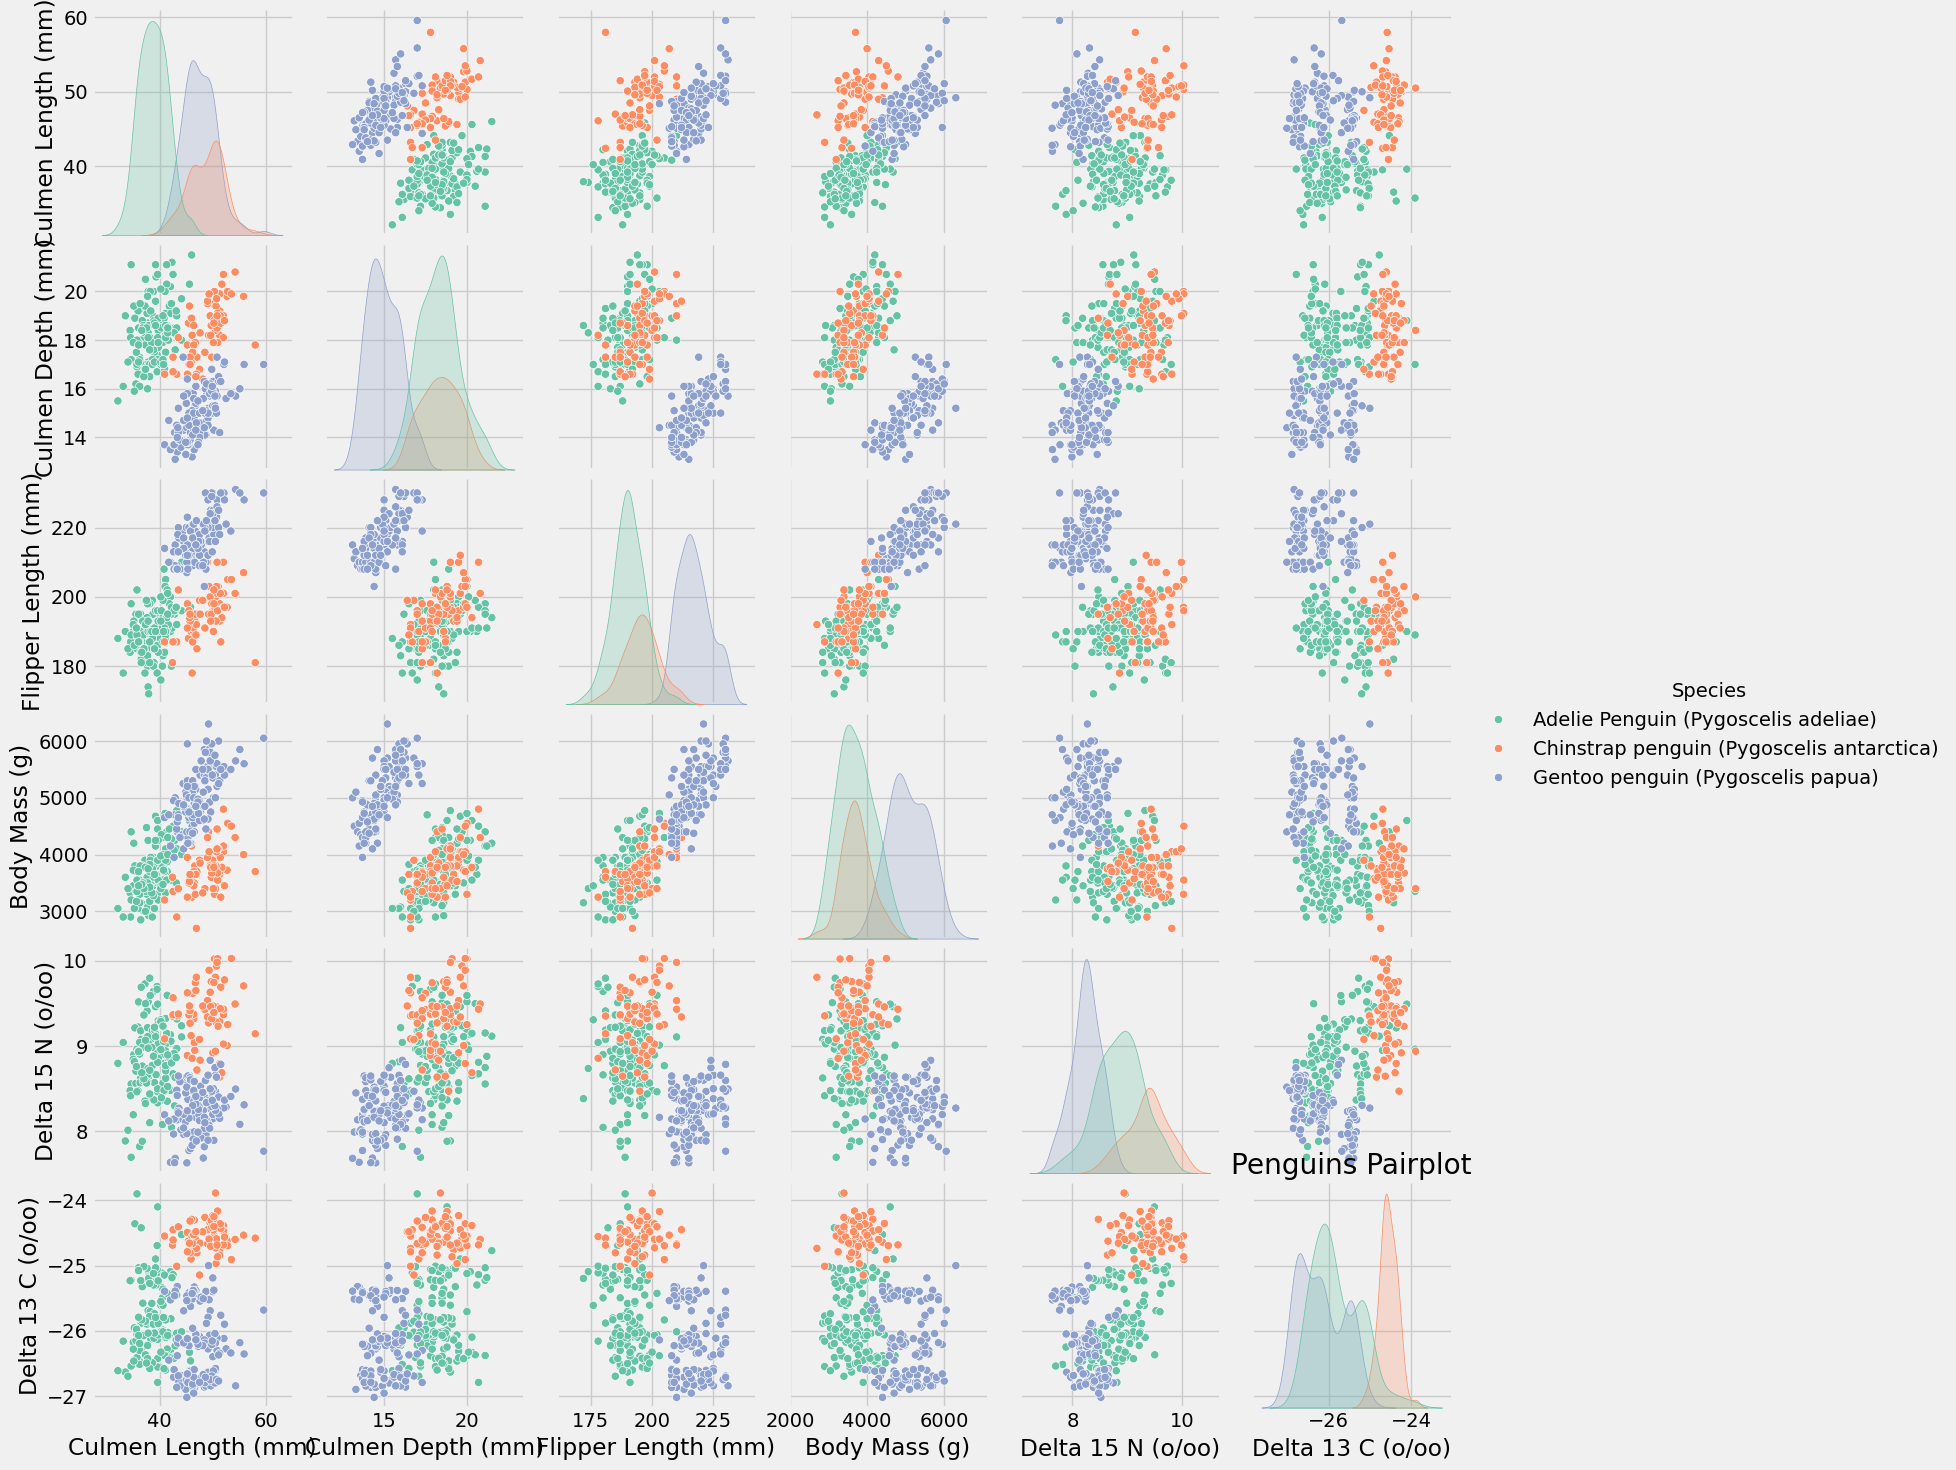

In [6]:
plt.figure(figsize=(12, 6))
sns.pairplot(penguins, vars=quant, hue='Species', palette="Set2", diag_kind="kde")
plt.xticks(rotation=45)
plt.title("Penguins Pairplot")
plt.show()

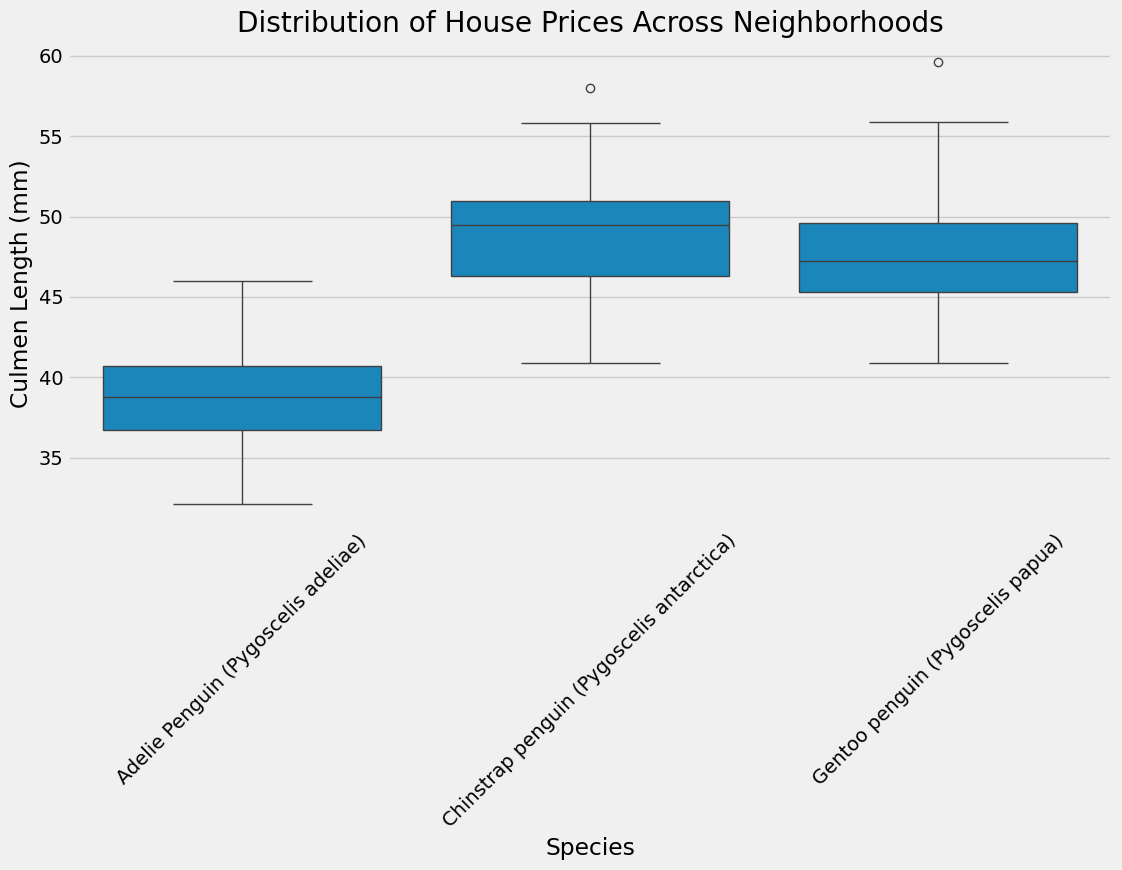

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=penguins, x="Species", y="Culmen Length (mm)")
plt.xticks(rotation=45)
plt.title("Distribution of House Prices Across Neighborhoods")
plt.show()

---

## 4. Performing ANOVA

...

In [8]:
# Step 1: Compute Group Means and Overall Mean
group_means = penguins.groupby("Species")["Culmen Length (mm)"].mean()
overall_mean = penguins["Culmen Length (mm)"].mean()

# Step 2: Compute Between-Group Sum of Squares (SSB)
ssb = sum(penguins.groupby("Species").size() * (group_means - overall_mean) ** 2)

# Step 3: Compute Within-Group Sum of Squares (SSW)
ssw = sum(sum((penguins[penguins["Species"] == group]["Culmen Length (mm)"] - group_mean) ** 2)
          for group, group_mean in group_means.items())

# Step 4: Compute Degrees of Freedom
penguins_between = len(group_means) - 1
penguins_within = len(penguins) - len(group_means)

# Step 5: Compute Mean Squares
msb = ssb / penguins_between
msw = ssw / penguins_within

# Step 6: Compute F-Statistic
f_statistic = msb / msw

# Step 7: Find p-value
p_value = 1 - stats.f.cdf(f_statistic, penguins_between, penguins_within)

print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.5f}")

F-statistic: 383.99, p-value: 0.00000


---

## 5. Sanity Check Using SciPy

...

In [9]:
anova_result = stats.f_oneway(*[penguins[penguins["Species"] == n]["Culmen Length (mm)"] for n in penguins["Species"].unique()])
print(f"Sanity Check - SciPy F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.5f}")

Sanity Check - SciPy F-statistic: 383.99, p-value: 0.00000


---

## 6. Non-Parametric Test: Sign Test for Matched Pairs

...

In [10]:
...

Ellipsis

---

## 7. Conclusion

...

---

**Woohoo! You have completed this notebook! 🚀**